# Capstone 2: West Nile Virus Prediction

# Initial Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv("train.csv", parse_dates=True)
weather = pd.read_csv("weather.csv", parse_dates=True)

In [3]:
train.shape

(10506, 12)

In [4]:
weather.shape

(2944, 22)

In [5]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [6]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [7]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [8]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [9]:
def fill_Tavg(x1,x2,x3):
    if pd.isnull(x3):
        x3=np.ceil((x1+x2)/2)
        return x3
    else:
        return x3
def calc_decadent_normal(x1,x2):
    if pd.isnull(x2):
        return np.nan
    else:
        return int(x1)-int(x2)
    

In [10]:
#filling NAs and dropping unneeded columns. FFill method used for missing values as asssociated columns have very similar values
weather=weather.replace('-', np.nan)
weather=weather.replace('M', np.nan)
median_speed = weather['AvgSpeed'].median()
weather['AvgSpeed'] = weather['AvgSpeed'].fillna(value=median_speed)

col = ['Sunrise', 'WetBulb', 'Sunset', 'Heat', 'Cool','SeaLevel','StnPressure']

for x in col: 
    weather[x] = weather[x].fillna(method='ffill')

weather['PrecipTotal'] = weather['PrecipTotal'].apply(lambda x: 0.00 if str(x).strip()=='T' or pd.isnull(x) else x)
weather['PrecipBool'] = weather['PrecipTotal'].apply(lambda x: 'N' if x=='0.00' else 'Y')
weather['Tavg']=weather.apply(lambda x: fill_Tavg(x['Tmax'], x['Tmin'], x['Tavg']), axis=1)
weather['decadent_normal']=weather.apply(lambda x: calc_decadent_normal(x['Tavg'], x['Depart']), axis=1)
weather['decadent_normal']=weather['decadent_normal'].fillna(method='ffill')
weather['Depart']=weather.apply(lambda x: int(x['Tavg'])-int(x['decadent_normal']), axis=1)

weather=weather.drop(['decadent_normal'], axis=1)
weather=weather.drop(['Water1','Depth', 'SnowFall', 'CodeSum'], axis=1)
train = train.drop(['Address', 'AddressNumberAndStreet'], axis = 1)


In [11]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
PrecipBool     0
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             10506 non-null  object 
 1   Species          10506 non-null  object 
 2   Block            10506 non-null  int64  
 3   Street           10506 non-null  object 
 4   Trap             10506 non-null  object 
 5   Latitude         10506 non-null  float64
 6   Longitude        10506 non-null  float64
 7   AddressAccuracy  10506 non-null  int64  
 8   NumMosquitos     10506 non-null  int64  
 9   WnvPresent       10506 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 820.9+ KB


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   int64  
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  PrecipTotal  2944 non-null   object 
 13  StnPressure  2944 non-null   object 
 14  SeaLevel     2944 non-null   object 
 15  ResultSpeed  2944 non-null   float64
 16  ResultDir    2944 non-null   int64  
 17  AvgSpeed     2944 non-null   object 
 18  PrecipBool   2944 non-null   object 
dtypes: flo

In [14]:
#Finding average of weather data between the two stations by date
weather = weather.drop("Station", axis = 1)
average = weather.groupby("Date").mean()
average.sort_values("Date", ascending = True)

,Tmax,Tmin,Depart,DewPoint,ResultSpeed,ResultDir
Date,,,,,,
2007-05-01,83.5,51.0,14.5,51.0,2.20,26.0
2007-05-02,59.5,42.5,-2.5,42.0,13.15,3.0
2007-05-03,66.5,47.0,3.0,40.0,12.30,6.5
2007-05-04,72.0,50.0,7.5,41.5,10.25,7.5
2007-05-05,66.0,53.5,5.0,38.5,11.45,7.0
...,...,...,...,...,...,...
2014-10-27,78.0,52.5,17.5,51.5,12.35,19.0
2014-10-28,67.0,46.5,10.0,39.0,14.40,26.0
2014-10-29,49.0,38.0,-3.0,33.0,9.00,29.0


In [15]:
merged = train.merge(average, on='Date')

In [16]:
def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

def create_year(x): 
    return x.split('-')[0]

merged['month'] = merged.Date.apply(create_month)
merged['day'] = merged.Date.apply(create_day)
merged['year']=merged.Date.apply(create_year)
merged.drop('Date', axis = 1, inplace = True)

In [17]:
#Finding the streets with the highest virus concentration
x = merged.groupby(['year','Block','Street'])['WnvPresent'].sum()
y = merged.groupby(['year','Block','Street'])['Street'].count()

z = pd.concat([x,y], axis=1)
z['% Count'] = np.round(x/y,4)*100

z.index.rename(['Year','Block','StreetName'],inplace=True)
z.reset_index(inplace=True, )
z.set_index(['Block','StreetName'], inplace=True)
z.rename({'Stree':'Strt_Rec_Cnt'}, inplace=True)
z[z['% Count']>0].sort_values(by=['Year','% Count'], ascending=[True,False])

,,Year,WnvPresent,Street,% Count
Block,StreetName,,,,
40,E 130TH ST,2007,5,24,20.83
36,N PITTSBURGH AVE,2007,7,35,20.00
50,S UNION AVE,2007,6,30,20.00
65,N OAK PARK AVE,2007,6,31,19.35
72,N OKETO AVE,2007,7,39,17.95
...,...,...,...,...,...
10,E 67TH ST,2013,1,27,3.70
62,N MCCLELLAN AVE,2013,1,27,3.70
17,W ADDISON ST,2013,1,29,3.45


# EDA

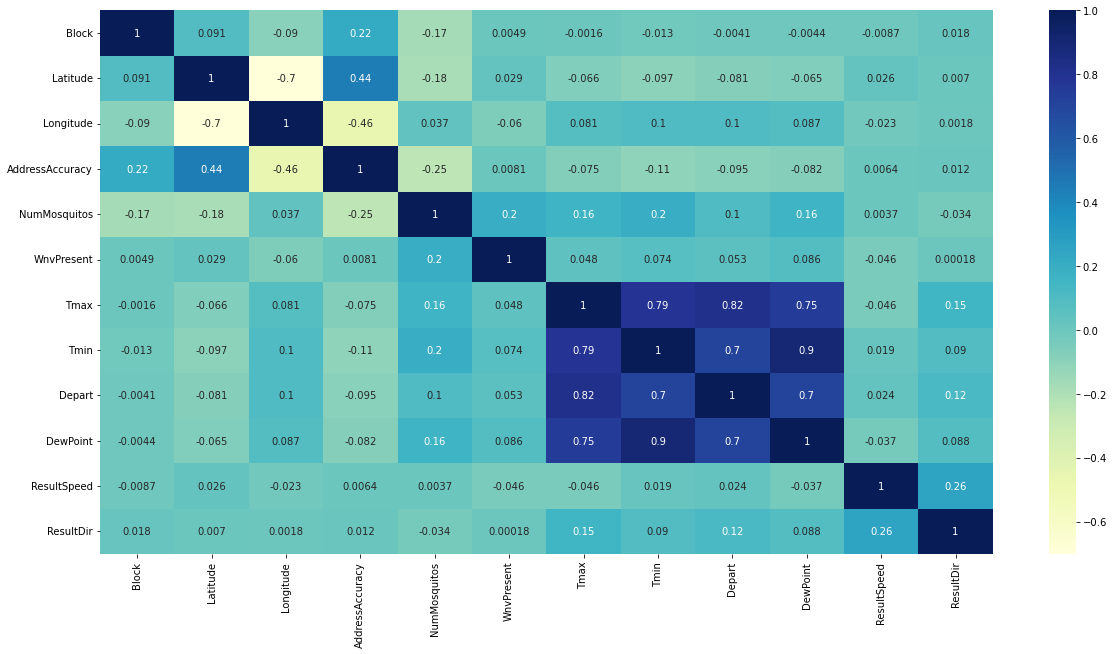

In [18]:
#Strongest relationships between Tmax, Tmin, Depart and DewPoint (expected for weather)
#
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(merged.corr(), annot=True, cmap="YlGnBu" ,ax = ax)
plt.show()

In [19]:
#Getting dummies

df = pd.get_dummies(merged, columns = ['Species', 'month', 'day', 'year'])
df

,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax,Tmin,...,day_26,day_27,day_28,day_29,day_30,day_31,year_2007,year_2009,year_2011,year_2013
0,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0,88.0,62.5,...,0,0,0,1,0,0,1,0,0,0
1,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0,88.0,62.5,...,0,0,0,1,0,0,1,0,0,0
2,62,N MANDELL AVE,T007,41.994991,-87.769279,9,1,0,88.0,62.5,...,0,0,0,1,0,0,1,0,0,0
3,79,W FOSTER AVE,T015,41.974089,-87.824812,8,1,0,88.0,62.5,...,0,0,0,1,0,0,1,0,0,0
4,79,W FOSTER AVE,T015,41.974089,-87.824812,8,4,0,88.0,62.5,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,51,W 72ND ST,T035,41.763733,-87.742302,8,6,1,75.0,52.5,...,1,0,0,0,0,0,0,0,0,1
10502,58,N RIDGE AVE,T231,41.987280,-87.666066,8,5,0,75.0,52.5,...,1,0,0,0,0,0,0,0,0,1
10503,17,N ASHLAND AVE,T232,41.912563,-87.668055,9,1,0,75.0,52.5,...,1,0,0,0,0,0,0,0,0,1
10504,71,N HARLEM AVE,T233,42.009876,-87.807277,9,5,0,75.0,52.5,...,1,0,0,0,0,0,0,0,0,1
